Linear Regression Machine Learning Algorithm implementation

In [65]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as  plt
from matplotlib import style
import pickle
import math

In [66]:
data = pd.read_csv("student_mat_2173a47420.csv",sep=";")

In [67]:
data = data[["G1", "G2", "G3", "studytime","failures","absences"]]
data = shuffle(data)
predict = "G3"

# features - attributes that determine labels
X = np.array(data.drop([predict],axis=1))

# labels - attributes to predict
y = np.array(data[predict])


x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3)


In [68]:
best = 0
# repetitve training to attain best results
for _ in range(20):
  x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.3)
  
  linear = linear_model.LinearRegression()
  
  linear.fit(x_train,y_train)
  acc = linear.score(x_test,y_test)
  
  if acc > best:
    best = acc

    # write model to file

    with open("studentgrades.pickle","wb") as f:
      pickle.dump(linear,f)
print(best*100,"%")

86.58125431821757 %


In [69]:
# read model from file

pickle_in = open("studentgrades.pickle","rb")
linear = pickle.load(pickle_in)

In [70]:
# get model predictions

predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])

6.200863078652396 [ 6  7  2  1 15] 8
13.235767582882106 [12 13  2  0 14] 12
11.890915585944283 [10 12  1  0  2] 12
12.700248819917727 [13 13  3  0  0] 13
-1.2755406781151328 [5 0 1 3 0] 0
7.488019343713944 [ 7  8  2  0 12] 8
16.142474475722782 [16 16  4  0 12] 16
14.102480043572228 [11 14  1  0  6] 14
17.817551302160336 [16 17  1  0  4] 18
7.381429823860051 [8 8 2 0 2] 8
9.54295682533108 [ 7 10  2  1 25] 11
16.07795259738889 [17 15  1  0  4] 16
8.519560391817611 [9 9 2 0 2] 10
9.887386637550327 [11 10  2  1 12] 10
14.56038690679438 [15 14  2  0  8] 14
17.07388361470008 [16 17  3  0  0] 17
13.072082663647855 [13 13  2  0  2] 13
11.933952095690296 [12 12  2  0  2] 11
14.288968799526941 [13 14  1  0  0] 13
10.530638588547895 [13 10  2  1 22] 11
8.081777174237978 [10  8  2  0 14] 9
4.156325448523962 [ 6  5  1  3 16] 5
9.242820606299032 [ 8 10  2  0  0] 12
-0.528497779845551 [7 0 2 0 0] 0
19.470854544794836 [18 18  1  1 24] 18
12.988353977326963 [15 13  3  2 14] 13
15.405439198943334 [15 15

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


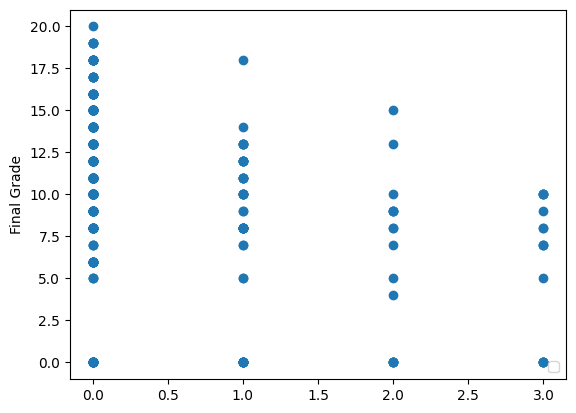

In [71]:
# plot output

plot = "failures"
plt.scatter(data[plot],data[predict])
plt.legend(loc=4)
plt.ylabel(plot)
plt.ylabel("Final Grade")
plt.show()